In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

# Montar o drive
drive.mount('/content/drive')

# Importar planilha e criar dataframe em pandas
file_path = '/content/drive/MyDrive/Dados_EB.xlsx'
nome_aba = 'Tabela 2.1'
df_empregados = pd.read_excel(file_path, sheet_name = nome_aba, skiprows=1)

# Mostrando primeiras linhas do dataframe
print(df_empregados.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   N Estado Civil   Grau de Instrução  N de Filhos  Salario (x Sal Min)  Anos  \
0  1     solteiro  ensino fundamental          NaN                 4.00    26   
1  2       casado  ensino fundamental          1.0                 4.56    32   
2  3       casado  ensino fundamental          2.0                 5.25    36   
3  4     solteiro        ensino médio          NaN                 5.73    20   
4  5     solteiro  ensino fundamental          NaN                 6.26    40   

   Meses Região de Procedência  
0      3              interior  
1     10               capital  
2      5               capital  
3     10                 outra  
4      7                 outra  


# **DISTRIBUIÇÃO DAS FREQUÊNCIAS - TABELAS DE EMPREGADOS (2.1)**

### **Variável Estado civil**

In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_empregados['Estado Civil'].value_counts()
total_empregados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_empregados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Estado Civil' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Estado Civil' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_estado_civil_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Estado Civil dos Empregados:")
print(tb_freq_estado_civil_completa.to_string(index=False))

Tabela de Frequência - Estado Civil dos Empregados:
Estado Civil  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
      casado               20            0.56                56.0
    solteiro               16            0.44                44.0
       TOTAL               36            1.00               100.0


### **Variável Região de procedência**
---

In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_empregados['Região de Procedência'].value_counts()
total_empregados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_empregados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Região de Procedência' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Região de Procedência' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_regiao_procedencia_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Região de Procedência dos Empregados:")
print(tb_freq_regiao_procedencia_completa.to_string(index=False))

Tabela de Frequência - Região de Procedência dos Empregados:
Região de Procedência  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
                outra               13            0.36                36.0
             interior               12            0.33                33.0
              capital               11            0.31                31.0
                TOTAL               36            1.00               100.0


### **Variável Número de Filhos de empregados casados**
---

In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_empregados['N de Filhos'].value_counts().sort_index()
total_empregados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_empregados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Núm. de Filhos' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Núm. de Filhos' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_qtd_filhos_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Número de Filhos dos Empregados (casados):")
print(tb_freq_qtd_filhos_completa.to_string(index=False))

Tabela de Frequência - Número de Filhos dos Empregados (casados):
Núm. de Filhos  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
           0.0                4            0.20                20.0
           1.0                5            0.25                25.0
           2.0                7            0.35                35.0
           3.0                3            0.15                15.0
           5.0                1            0.05                 5.0
         TOTAL               20            1.00               100.0


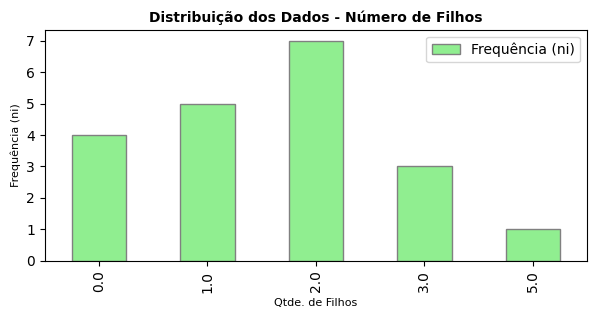

In [ ]:
# Filtrando tabela para gráfico de barras
df_num_filhos = tb_freq_qtd_filhos_completa[tb_freq_qtd_filhos_completa['Núm. de Filhos'] != 'TOTAL']

# Criando Gráfico de Barras
plt.rcParams['figure.figsize'] = (7,3)
df_num_filhos.plot.bar(x='Núm. de Filhos', y='Frequência (ni)', color= 'lightgreen', edgecolor= 'gray')
plt.title('Distribuição dos Dados - Número de Filhos', fontsize= 10, fontweight= 'bold')
plt.xlabel('Qtde. de Filhos', fontsize=8)
plt.ylabel('Frequência (ni)', fontsize=8)
plt.show()

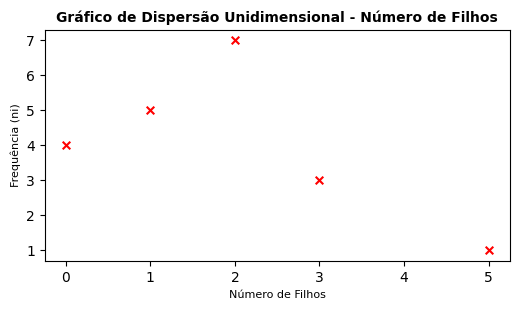

In [ ]:
# Criação de Gráfico de Dispersão Unidimensional
plt.rcParams['figure.figsize'] = (6,3)
plt.scatter(df_num_filhos['Núm. de Filhos'],df_num_filhos['Frequência (ni)'],color='red', s=30, marker='x')
plt.title('Gráfico de Dispersão Unidimensional - Número de Filhos', fontsize= 10, fontweight='bold')
plt.xlabel('Número de Filhos', fontsize=8)
plt.ylabel('Frequência (ni)', fontsize=8)
plt.show()

### **Variável Idade**
---

In [ ]:
# Determinar as classes
# Criando 5 classes
idade_min = int(df_empregados['Anos'].min())
idade_max = int(df_empregados['Anos'].max())

# Ajustando para múltiplos de 5 (para ficar mais limpo)
idade_min_ajustada = (idade_min // 5) * 5  # Arredonda para múltiplo de 5 abaixo
idade_max_ajustada = ((idade_max // 5) + 1) * 5  # Arredonda para múltiplo de 5 acima

# Criando as classes (bins)
bins = list(range(idade_min_ajustada, idade_max_ajustada + 5, 5))  # Classes de 5 em 5 anos
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]  # Rótulos: "20-24", "25-29", etc.

# Criando a coluna com a classe de idade
df_empregados['Faixa Etária'] = pd.cut(
    df_empregados['Anos'],
    bins=bins,
    labels=labels,
    right=False  # [a, b) - inclui a, exclui b
)

# Criação de variáveis para armazenar frequências
freq_absoluta = df_empregados['Faixa Etária'].value_counts().sort_index()
total_empregados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_empregados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Faixa Etária' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Faixa Etária' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_idade_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Idade dos Empregados:")
print(tb_freq_idade_completa.to_string(index=False))

Tabela de Frequência - Idade dos Empregados:
Faixa Etária  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
       20-24                2            0.06                 6.0
       25-29                6            0.17                17.0
       30-34               10            0.28                28.0
       35-39                8            0.22                22.0
       40-44                8            0.22                22.0
       45-49                2            0.06                 6.0
       TOTAL               36            1.01               101.0


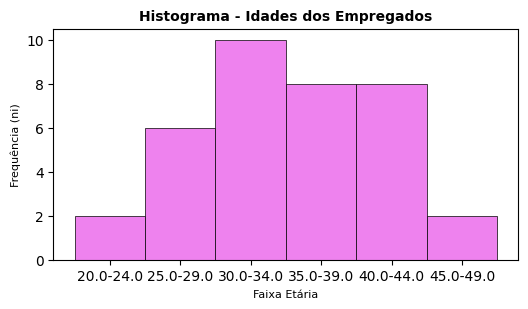

In [ ]:
# Filtrando tabela de Idade dos empregados
df_Idade = tb_freq_idade_completa[tb_freq_idade_completa['Faixa Etária'] != 'TOTAL']

# Criando um Histograma
n, bins, patches = plt.hist(x=df_empregados['Anos'], bins=bins, color='violet',edgecolor='black', linewidth=0.5)
plt.title('Histograma - Idades dos Empregados', fontsize=10, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=8)
plt.ylabel('Frequência (ni)', fontsize=8)

# Criação dos labels para cada faixa percorrendo a lista de bins
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Calcula o ponto médio de cada faixa por meio dos bins (limite inferior e superior da faixa)
posicoes = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# Aplica os rótulos
plt.xticks(posicoes, labels)

plt.show()

### **Variável Grau de Instrução**
---

In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_empregados['Grau de Instrução'].value_counts()
total_empregados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_empregados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Grau de Instrução' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Grau de Instrução' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_grau_instrucao_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Grau de Instrução dos Empregados:")
print(tb_freq_grau_instrucao_completa.to_string(index=False))

Tabela de Frequência - Grau de Instrução dos Empregados:
 Grau de Instrução  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
      ensino médio               18            0.50                50.0
ensino fundamental               12            0.33                33.0
          superior                6            0.17                17.0
             TOTAL               36            1.00               100.0


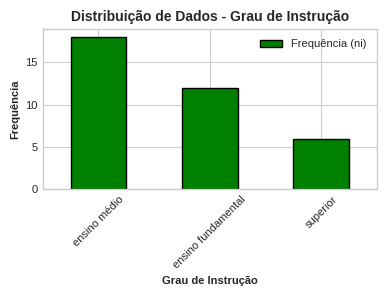

In [ ]:
# Criação de Gráfico de Barras
import matplotlib.pyplot as plt

# Filtro do Dataframe para omitir linha de TOTAIS
df_grau_instrucao = tb_freq_grau_instrucao_completa[tb_freq_grau_instrucao_completa['Grau de Instrução'] != 'TOTAL']

# Configuração para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.size'] = 8

# Construção do gráfico
df_grau_instrucao.plot.bar(x='Grau de Instrução', y='Frequência (ni)', color='green', edgecolor='black')
plt.title('Distribuição de Dados - Grau de Instrução', fontsize = 10, fontweight = 'bold')
plt.xlabel('Grau de Instrução', fontweight= 'bold')
plt.ylabel('Frequência' , fontweight= 'bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

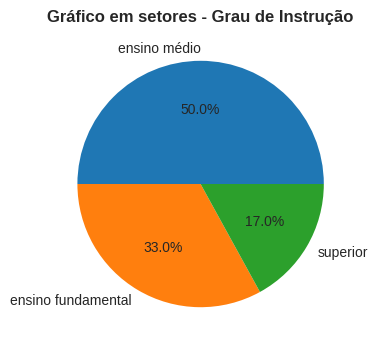

In [ ]:
# Criação de Gráfico de Setores (pizza)
plt.rcParams['font.size'] = 10
plt.figure(figsize=(4,4))
plt.pie(df_grau_instrucao['Porcentagem % (fi)'],labels=df_grau_instrucao['Grau de Instrução'], autopct='%1.1f%%')
plt.title('Gráfico em setores - Grau de Instrução', fontsize=12, fontweight='bold')
plt.show()

### **Variável Salários**
---

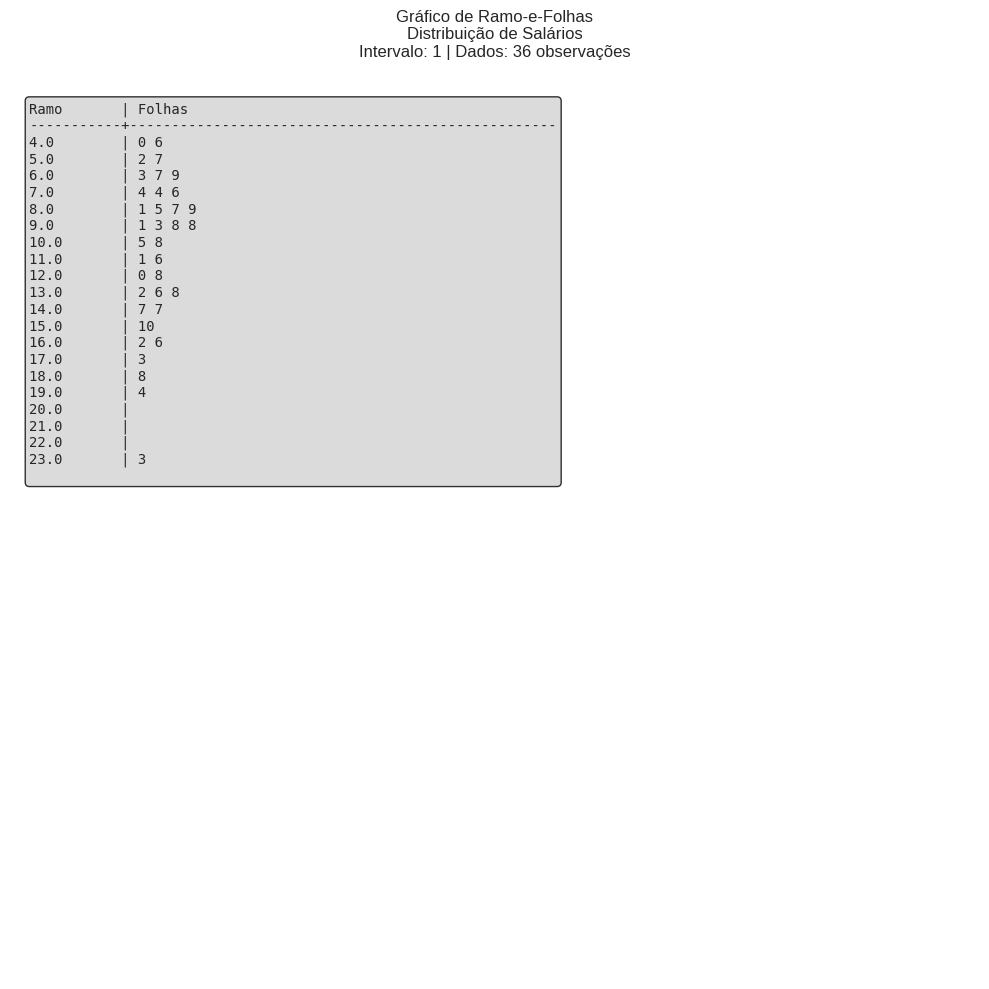

In [ ]:
# Mostrar salários
lista_salarios = df_empregados['Salario (x Sal Min)'].to_list()

import matplotlib.pyplot as plt
import numpy as np

def ramo_folhas_matplotlib_corrigido(dados, intervalo=1, titulo="", mostrar_ramos_vazios=False):
    # Converter para números e ordenar
    dados_np = np.array([d for d in dados if not np.isnan(d)])
    dados_ordenados = np.sort(dados_np)

    # Preparar dados
    ramos = {}

    for valor in dados_ordenados:
        # Para dados com decimais, o "ramo" é a parte inteira
        ramo = int(valor // intervalo)

        # A "folha" é o primeiro dígito decimal (ou o que queremos mostrar)
        # Multiplicamos por 10 para pegar o primeiro dígito decimal
        folha = int(round((valor % intervalo) * 10))

        if ramo not in ramos:
            ramos[ramo] = []
        ramos[ramo].append(folha)

    # Se quiser mostrar ramos vazios
    if mostrar_ramos_vazios:
        min_ramo = min(ramos.keys()) if ramos else 0
        max_ramo = max(ramos.keys()) if ramos else 0

        for ramo in range(min_ramo, max_ramo + 1):
            if ramo not in ramos:
                ramos[ramo] = []

    # Criar figura
    fig_height = max(6, len(ramos) * 0.4 + 2)
    fig, ax = plt.subplots(figsize=(10, fig_height))

    # Remover eixos
    ax.axis('off')

    # Texto do gráfico
    texto = f"{'Ramo':<10} | {'Folhas'}\n"
    texto += f"{'-'*10}-+-{'-'*50}\n"

    for ramo in sorted(ramos.keys()):
        folhas_ordenadas = sorted(ramos[ramo])

        # Converter folhas para string, mas garantir que 0 apareça como '0'
        folhas_str = ' '.join([str(f) for f in folhas_ordenadas])

        # Se não houver folhas (ramo vazio)
        if not folhas_ordenadas:
            folhas_str = " "

        # Mostrar ramo multiplicado pelo intervalo
        ramo_display = ramo * intervalo
        texto += f"{ramo_display:<10.1f} | {folhas_str}\n"

    # Adicionar texto
    ax.text(0.02, 0.98, texto, fontfamily='monospace', fontsize=10,
            verticalalignment='top', transform=ax.transAxes,
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    # Título com informações
    titulo_completo = f'Gráfico de Ramo-e-Folhas\n{titulo}\n'
    titulo_completo += f'Intervalo: {intervalo} | Dados: {len(dados_ordenados)} observações'

    plt.title(titulo_completo, fontsize=12, pad=20)
    plt.tight_layout()
    plt.show()

    return ramos

# Executando a função
ramos1 = ramo_folhas_matplotlib_corrigido(lista_salarios, intervalo=1, titulo="Distribuição de Salários", mostrar_ramos_vazios=True)

# **DISTRIBUIÇÃO DAS FREQUÊNCIAS - POPULAÇÃO URBANA E DENSIDADE POPULACIONAL**

### **Variável População Urbana**
---

In [ ]:
# Importando dataset para exercício
nome_aba = 'CD-Brasil'
df_Brasil = pd.read_excel(file_path, sheet_name=nome_aba, skiprows=4)
df_Brasil.head(5)

,Região,Estado,Superfície,População,Densidade
0,Norte,RO,237576.167,1453756,6.119115
1,NaN,AC,164165.250,653385,3.980044
2,NaN,AM,1559161.810,3221940,2.066456
3,NaN,RR,224298.980,395725,1.764275
4,NaN,PA,1247689.515,7065573,5.662926


In [ ]:
# Criando classes
classes = [0,1000000, 2000000, 5000000, 10000000,100000000]
rotulos = ['Menos de 1M', 'De 1M a 1,99M', 'De 2M a 4,99M', 'De 5M a 9,99M', 'Mais de 10M']

# Adicionando coluna para faixas de população
df_Brasil['Faixa População'] = pd.cut(
    df_Brasil['População'],
    bins= classes,
    labels= rotulos,
    right= False
)

df_Brasil.head(5)

,Região,Estado,Superfície,População,Densidade,Faixa População
0,Norte,RO,237576.167,1453756,6.119115,"De 1M a 1,99M"
1,NaN,AC,164165.250,653385,3.980044,Menos de 1M
2,NaN,AM,1559161.810,3221940,2.066456,"De 2M a 4,99M"
3,NaN,RR,224298.980,395725,1.764275,Menos de 1M
4,NaN,PA,1247689.515,7065573,5.662926,"De 5M a 9,99M"


In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_Brasil['Faixa População'].value_counts().sort_index()
total_populacao = freq_absoluta.sum()

proporcao = (freq_absoluta / total_populacao).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'População' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'População' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - População:")
print(tb_freq_completa.to_string(index=False))

Tabela de Frequência - População:
    População  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
  Menos de 1M                3            0.11                11.0
De 1M a 1,99M                3            0.11                11.0
De 2M a 4,99M                9            0.33                33.0
De 5M a 9,99M                6            0.22                22.0
  Mais de 10M                6            0.22                22.0
        TOTAL               27            0.99                99.0


### **Variável Densidade Populacional**
---

In [ ]:
# Criando as classes
classes = [0,10,20,50,100,1000]
rotulos = ['Menos de 10','De 10 a 19,99', 'De 20 a 49,99', 'De 50 a 99,99', 'Mais de 100' ]

# Adicionando coluna para faixas de densidade populacional
df_Brasil['Faixa Densidade Populacional']= pd.cut(
    df_Brasil['Densidade'],
    bins= classes,
    labels= rotulos,
    right= False
)

df_Brasil.head(5)

,Região,Estado,Superfície,População,Densidade,Faixa População,Faixa Densidade Populacional
0,Norte,RO,237576.167,1453756,6.119115,"De 1M a 1,99M",Menos de 10
1,NaN,AC,164165.250,653385,3.980044,Menos de 1M,Menos de 10
2,NaN,AM,1559161.810,3221940,2.066456,"De 2M a 4,99M",Menos de 10
3,NaN,RR,224298.980,395725,1.764275,Menos de 1M,Menos de 10
4,NaN,PA,1247689.515,7065573,5.662926,"De 5M a 9,99M",Menos de 10


In [ ]:
# Criação de variáveis para armazenar frequências
freq_absoluta = df_Brasil['Faixa Densidade Populacional'].value_counts().sort_index()
total_densidade = freq_absoluta.sum()

proporcao = (freq_absoluta / total_densidade).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Densidade Populacional' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Densidade Populacional' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Densidade Populacional:")
print(tb_freq_completa.to_string(index=False))

Tabela de Frequência - Densidade Populacional:
Densidade Populacional  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
           Menos de 10                9            0.33                33.0
         De 10 a 19,99                3            0.11                11.0
         De 20 a 49,99                3            0.11                11.0
         De 50 a 99,99                8            0.30                30.0
           Mais de 100                4            0.15                15.0
                 TOTAL               27            1.00               100.0


# **PROBLEMAS PROPOSTOS NO LIVRO**

### Problema 4:
O número de erros de impressão da primeira página de um jornal durante 50 dias está na lista baixo. Representar os dados graficamente, criar um histograma e um gráfico de ramo-e-folhas

In [ ]:
# Lista da quantidade de erros por dia no jornal
lista_erros=[8,11,8,12,14,13,11,14,14,15,6,10,14,19,6,12,7,5,8,8,10,16,10,12,12,8,11,6,7,12,7,10,14,5,12,7,9,12,11,9,14,8,14,8,12,10,12,22,7,15]

print('Quantidade de itens na lista: ',len(lista_erros))

df_erros = pd.DataFrame(lista_erros,columns=['Qtde. erros'])

# Criação de variáveis para armazenar frequências
freq_absoluta = df_erros['Qtde. erros'].value_counts().sort_index()
total_dados = freq_absoluta.sum()

proporcao = (freq_absoluta / total_dados).round(2)
porcentagem = (proporcao * 100).round(2)

# Criação de Dataframe
tb_freq = pd.DataFrame({
    'Núm. de Erros' : freq_absoluta.index,
    'Frequência (ni)' : freq_absoluta.values,
    'Proporção (fi)' : proporcao.values,
    'Porcentagem % (fi)' : porcentagem.values
})

# Adicionando Total ao Dataframe
total = pd.DataFrame({
    'Núm. de Erros' : ['TOTAL'],
    'Frequência (ni)' : [freq_absoluta.sum()],
    'Proporção (fi)' : [proporcao.sum()],
    'Porcentagem % (fi)' : [porcentagem.sum()]
})

# Juntando tabela principal e totais
tb_freq_completa = pd.concat([tb_freq, total], ignore_index= True)

# Imprimindo o Dataframe
print("Tabela de Frequência - Número de Erros por dia:")
print(tb_freq_completa.to_string(index=False))

Quantidade de itens na lista:  50
Tabela de Frequência - Número de Erros por dia:
Núm. de Erros  Frequência (ni)  Proporção (fi)  Porcentagem % (fi)
            5                2            0.04                 4.0
            6                3            0.06                 6.0
            7                5            0.10                10.0
            8                7            0.14                14.0
            9                2            0.04                 4.0
           10                5            0.10                10.0
           11                4            0.08                 8.0
           12                9            0.18                18.0
           13                1            0.02                 2.0
           14                7            0.14                14.0
           15                2            0.04                 4.0
           16                1            0.02                 2.0
           19                1            0.02 

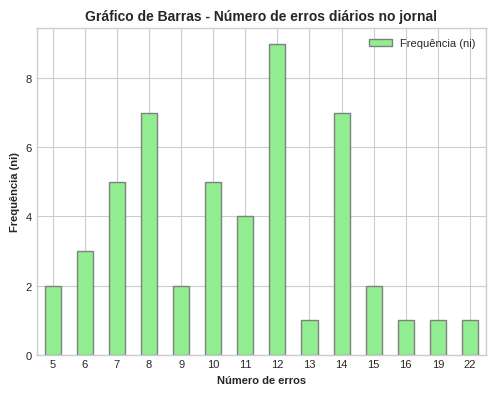

In [ ]:
# Filtragem do dataframe para criação de gráfico
df_filtrado = tb_freq_completa[tb_freq_completa['Núm. de Erros'] != 'TOTAL']

# Configuração para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['font.size'] = 8

# Construção do gráfico de BARRAS
df_filtrado.plot.bar(x='Núm. de Erros', y='Frequência (ni)', color='lightgreen', edgecolor='gray')
plt.title('Gráfico de Barras - Número de erros diários no jornal',fontsize=10, fontweight='bold')
plt.xlabel('Número de erros', fontweight='bold')
plt.ylabel('Frequência (ni)', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


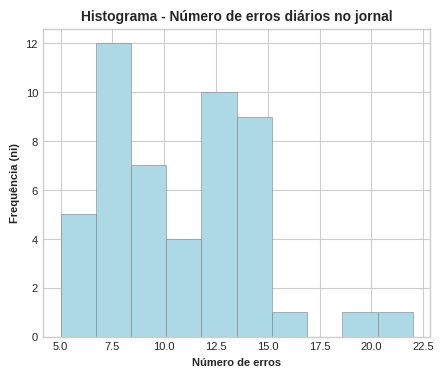

In [ ]:
# Construção gráfico de Histograma
n, bins, patches = plt.hist(lista_erros, color='lightblue', edgecolor='gray', linewidth=0.4)
plt.title('Histograma - Número de erros diários no jornal', fontsize=10, fontweight='bold')
plt.xlabel('Número de erros', fontweight='bold')
plt.ylabel('Frequência (ni)', fontweight='bold')

plt.show()

In [ ]:
# Criação de Gráfico de Ramo-e-folhas (AINDA EM ESTUDO)
dados = sorted(lista_erros)

print("\n" + "="*50)
print("RAMO-E-FOLHAS")
print("="*50)

# Definição de ramos
ramos = [
    (5, 7),
    (8, 10),
    (11, 13),
    (14, 16),
    (17, 19),
    (20, 22)
]

# Para cada ramo
for inicio, fim in ramos:
    # Filtrar valores
    valores = [v for v in dados if inicio <= v <= fim]

    if valores:
        # Calcular folhas
        folhas = [v - inicio for v in valores]
        folhas.sort()

        # Converter para string
        folhas_str = ' '.join(str(f) for f in folhas)

        print(f"\n{inicio}-{fim} | {folhas_str}")
    else:
        print(f"\n{inicio}-{fim} | ---")


RAMO-E-FOLHAS

5-7 | 0 0 1 1 1 2 2 2 2 2

8-10 | 0 0 0 0 0 0 0 1 1 2 2 2 2 2

11-13 | 0 0 0 0 1 1 1 1 1 1 1 1 1 2

14-16 | 0 0 0 0 0 0 0 1 1 2

17-19 | 2

20-22 | 2


### Problema 5:
Usando a tabela 2.1, montar um histograma para a variável Idade e criar uma representação gráfica para a variável grau de instrução

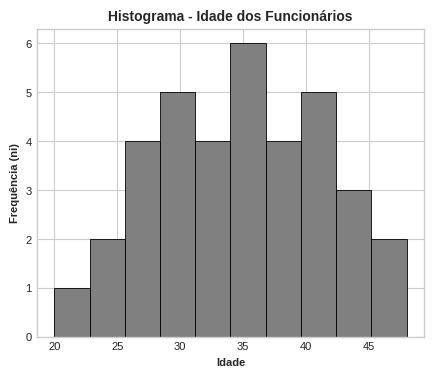

In [ ]:
# Configuração para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['font.size'] = 8

# Construir um histograma
n, bins, patches = plt.hist(df_empregados['Anos'].tolist(), color= 'gray', edgecolor='black', linewidth=0.6)
plt.title('Histograma - Idade dos Funcionários', fontsize=10, fontweight='bold')
plt.xlabel('Idade', fontweight= 'bold')
plt.ylabel('Frequência (ni)', fontweight='bold')

plt.show()

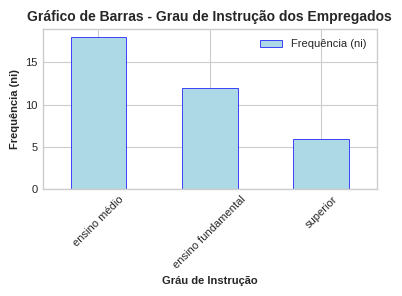

In [ ]:
# Filtrando tabela de frequência de grau de instrução
df_filtrado = tb_freq_grau_instrucao_completa[tb_freq_grau_instrucao_completa['Grau de Instrução'] != 'TOTAL']

# Configuração e criação de gráfico de barras
plt.rcParams['figure.figsize']=(4,3)

df_filtrado.plot.bar('Grau de Instrução','Frequência (ni)',color='lightblue', edgecolor='blue', linewidth=0.5)
plt.title('Gráfico de Barras - Grau de Instrução dos Empregados', fontsize=10, fontweight='bold')
plt.xlabel('Gráu de Instrução', fontweight='semibold')
plt.ylabel('Frequência (ni)', fontweight='semibold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Problema 6:
As taxas médias geométricas de incremento anual (por 100 habitantes) dos 30 maiores municípios do Brasil estão na lista abaixo.

*   Construir um histograma
*   Construir gráfico de dispersão unidimensional


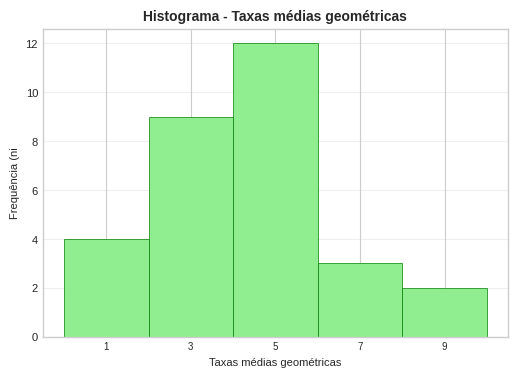

In [ ]:
# Lista de taxas médias geométricas de incremento anual (por 100 habitantes) dos 30 maiores municípios
lista_taxas =[3.67,1.82,3.73,4.10,4.30,1.28,8.14,2.43,4.17,5.36,3.96,6.54,5.84,7.35,3.63,2.93,2.82,8.45,5.28,5.41,7.77,4.64,1.88,2.12,4.26,2.78,5.54,0.90,5.09,4.07]

# Ordenando lista
lista_taxas.sort()

# Configurando tamanho do gráfico
plt.rcParams['figure.figsize'] = (6,4)

# Criando os bins para o histograma
inicio = 0
fim = 10
bins = list(range(inicio,fim+2, 2))

# Posição do label das barras
label_barras = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

# Construindo histograma
n, bins, patches = plt.hist(lista_taxas,bins = bins, color='lightgreen', edgecolor='green', linewidth=0.5)
plt.title('Histograma - Taxas médias geométricas', fontsize=10, fontweight='bold')
plt.xlabel('Taxas médias geométricas')
plt.ylabel('Frequência (ni')
plt.xticks(label_barras, fontsize=7)
plt.grid(axis='y', alpha=0.3)

plt.show()


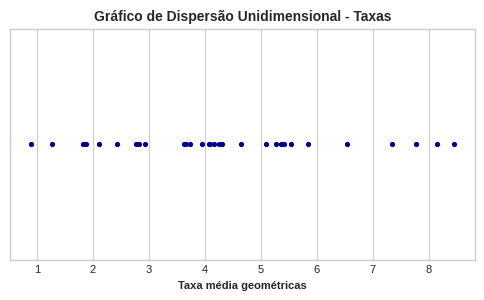

In [ ]:
# Dataframe de Frequência das taxas
df_taxas = pd.DataFrame(lista_taxas, columns=['Taxa'])
freq_absoluta = df_taxas['Taxa'].value_counts().sort_index()

df_taxas['Frequência (ni)'] = freq_absoluta.values

# Construção de Gráfico de Dispersão Unidimensional

plt.rcParams['figure.figsize']=(6,3)

plt.scatter(df_taxas['Taxa'],df_taxas['Frequência (ni)'],s=30, color='darkblue', marker='.')
plt.title('Gráfico de Dispersão Unidimensional - Taxas', fontsize=10, fontweight='bold')
plt.xlabel('Taxa média geométricas', fontweight='bold')
plt.yticks([])
plt.show()


### Problema 8:
A partir da planilha CD-Municipios:

*   Construir um histograma
*   Construir gráfico de dispersão unidimensional
*   Construir gráfico de ramo-e-folhas

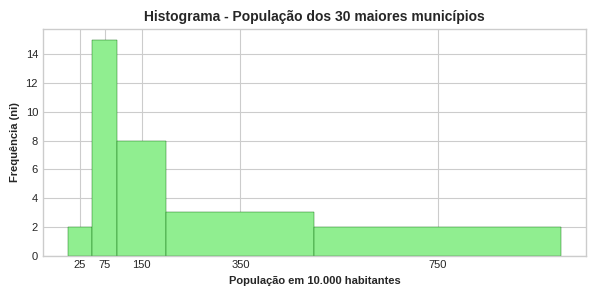

In [ ]:
# Importando o dataset
file_path = '/content/drive/MyDrive/Dados_EB.xlsx'
nome_aba = 'CD-Municipios'
df_municipios = pd.read_excel(file_path, sheet_name = nome_aba, skiprows=4)

# Retirando valor vazio da coluna
df_municipios = df_municipios[df_municipios['População'] != " "]

bins = [0,50,100,200,500,1000]
rotulos = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

n, bins, patches = plt.hist(df_municipios['População'],bins, color='lightgreen', edgecolor='darkgreen', linewidth=0.3)
plt.title('Histograma - População dos 30 maiores municípios', fontsize=10, fontweight='bold')
plt.xlabel('População em 10.000 habitantes', fontweight='bold')
plt.ylabel('Frequência (ni)', fontweight='bold')
plt.xticks(rotulos)
plt.tight_layout()
plt.show()

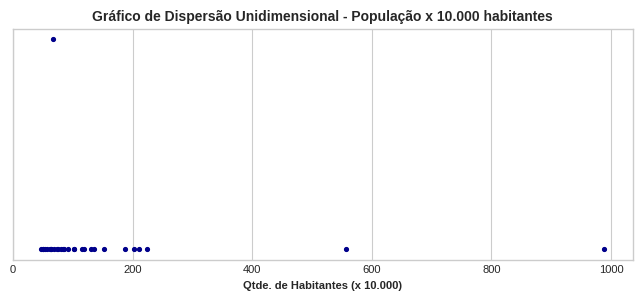

In [174]:
# Dataframe de Frequência da População em 10.000 habitantes
df_Populacao = pd.DataFrame(df_municipios['População'].tolist(), columns=['População'])

# Frequências absolutas
freq_absoluta = df_Populacao['População'].value_counts().sort_index()

# Construção de Gráfico de Dispersão Unidimensional
plt.rcParams['figure.figsize']=(8,3)

plt.scatter(freq_absoluta.index,freq_absoluta.values,s=30, color='darkblue', marker='.')
plt.title('Gráfico de Dispersão Unidimensional - População x 10.000 habitantes', fontsize=10, fontweight='bold')
plt.xlabel('Qtde. de Habitantes (x 10.000)', fontweight='bold')
plt.yticks([])
plt.show()

